In [1]:
import pickle
import pandas as pd
import numpy as np
import nltk

In [2]:
with open('reviews.pkl', 'rb') as handle:
    data = pickle.load(handle)

In [3]:
titles = list(data.keys())

In [4]:
train_titles = titles#[:250]
test_titles = titles[250:]
text = 'i am batman'

In [5]:
reviews = []
bi_reviews = []
ratings = []
vocab = []
bi_vocab = []
lengths = []
for each_title in train_titles:
    r_pair = data[each_title]
    for each_pair in r_pair:
        reviews.append(each_pair[0])        
        ratings.append(int(each_pair[1]))
        vocab += each_pair[0].split()
        lengths.append(len(each_pair[0].split()))
        
        bi_reviews.append(list(nltk.bigrams(each_pair[0].split())))
        bi_vocab += list(nltk.bigrams(each_pair[0].split()))
# for each_title in test_titles:
#     r_pair = data[each_title]
#     for each_pair in r_pair:
#         vocab += each_pair[0].split()
#         lengths.append(len(each_pair[0].split()))

In [6]:
np.mean(lengths)

347.11189099917425

In [8]:
print(len(ratings))

7266


In [9]:
ratings = np.asarray(ratings)
rat_mean = int(np.mean(ratings))
count = 0
for i in range(0,len(ratings)):
    if ratings[i] == 0:
        ratings[i] = rat_mean
        count += 1

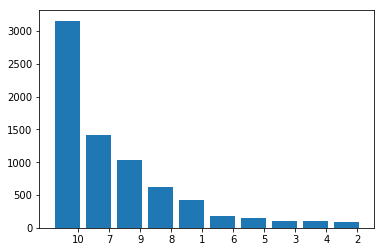

In [11]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

word_list = ratings
counts = Counter(word_list)
labels, values = zip(*counts.items())
indSort = np.argsort(values)[::-1]
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

plt.xticks(indexes + bar_width, labels)
plt.show()


In [12]:
values

array([3157, 1419, 1027,  623,  423,  177,  143,  108,   97,   92])

In [150]:
word_indices = dict((c, i) for i, c in enumerate(bi_vocab))

In [151]:
maxlen = 350
X = np.zeros((len(ratings),maxlen),dtype = 'int')
Y = np.zeros((len(reviews),10))

In [152]:
for i in range(len(ratings)):
    r_words = bi_reviews[i]
    r_len = len(r_words)
    w_len = 0
    if r_len > maxlen:
        w_len = maxlen
    else:
        w_len = r_len
    for j in range(w_len):
        X[i,j] = word_indices[r_words[j]]
    Y[i,int(ratings[i])-1] = 1

In [153]:
Y = ratings/10
novs = int(len(ratings)*0.8)
X_train, Y_train, X_val, Y_val = X[:novs], Y[:novs],X[novs:],Y[novs:]

In [154]:
print(X.shape, X_train.shape,X_val.shape)

(7266, 350) (5812, 350) (1454, 350)


In [155]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,GRU

In [156]:
batch_size = 128
max_features = 10000#len(vocab)
X = sequence.pad_sequences(X, maxlen=maxlen)

In [157]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, return_sequences=False))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [158]:
model.fit(X_train, Y_train,batch_size=batch_size,epochs=4,validation_data=(X_val, Y_val))
score, acc = model.evaluate(X_val, Y_val,batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 5812 samples, validate on 1454 samples
Epoch 1/4
5812/5812 [==============================] - 23s 4ms/step - loss: 0.0861 - acc: 0.4563 - val_loss: 0.0741 - val_acc: 0.3116
Epoch 2/4
5812/5812 [==============================] - 19s 3ms/step - loss: 0.0818 - acc: 0.4652 - val_loss: nan - val_acc: 0.3116
Epoch 3/4
5812/5812 [==============================] - 19s 3ms/step - loss: 0.0912 - acc: 0.4652 - val_loss: nan - val_acc: 0.3116
Epoch 4/4
1454/1454 [==============================] - 1s 923us/step
Test score: nan
Test accuracy: 0.31155433279284095


In [159]:
preds = model.predict(X_train[900:1000])
for pred in preds:
#     print(np.argmax(preds[0]))
    print(pred*10)

[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
